In [2]:
import mariadb
import pandas
import plotly
import pandas as pd
import matplotlib as plt
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [3]:
conn = mariadb.connect(
        user="bi2021",
        password="businessintelligence",
        host="212.201.138.114",
        port=3306,
        database="homeassistant"
    )

cur = conn.cursor()

In [4]:
cur.execute("SHOW DATABASES;")

for i in cur:
    print (i)

('homeassistant',)
('information_schema',)
('mysql',)
('performance_schema',)
('test',)


In [5]:
cur.execute("show tables from homeassistant")
tables = cur

for i in tables:
    print("table:", i[0])
    #sql = "show columns from %s"
    #cur.execute(sql, [i[0],])

table: events
table: recorder_runs
table: schema_changes
table: states
table: statistics
table: statistics_meta
table: statistics_runs


In [6]:
cur.execute("show columns from states")

cols = []

for i in cur:
    print(i[0])
    cols.append(i[0])

cols

state_id
domain
entity_id
state
attributes
event_id
last_changed
last_updated
created
old_state_id


['state_id',
 'domain',
 'entity_id',
 'state',
 'attributes',
 'event_id',
 'last_changed',
 'last_updated',
 'created',
 'old_state_id']

In [7]:
cur.execute("SELECT * FROM states LIMIT 1000 WHERE entity_id=(?)", ("sensor.sensor_2_uptime",))
for i in cur:
    print (i)

ProgrammingError: You have an error in your SQL syntax; check the manual that corresponds to your MariaDB server version for the right syntax to use near 'WHERE entity_id=(?)' at line 1

In [30]:
cur.execute("SELECT * FROM states")
df = pd.DataFrame(data=cur.fetchall(), columns=cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303752 entries, 0 to 303751
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   state_id      303752 non-null  int64         
 1   domain        303752 non-null  object        
 2   entity_id     303752 non-null  object        
 3   state         303751 non-null  object        
 4   attributes    303752 non-null  object        
 5   event_id      303752 non-null  int64         
 6   last_changed  303752 non-null  datetime64[ns]
 7   last_updated  303752 non-null  datetime64[ns]
 8   created       303752 non-null  datetime64[ns]
 9   old_state_id  303559 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 23.2+ MB


In [43]:
def drop_non_relevant(df):
    df = df.drop(df[df["entity_id"]=="person.fschmidmichels"].index, 0)
    df = df.drop(df[df["entity_id"]=="weather.langer_weg"].index, 0)
    df = df.drop(df[df["entity_id"]=="zone.home"].index, 0)
    df = df.drop(df[df["entity_id"]=="script.print_entities_to_file"].index, 0)
    df = df.drop(df[df["entity_id"]=="sensor.wlan_switch_energy_totalstarttime"].index, 0)
    df = df.drop(df[df["entity_id"]=="sensor.wlan_switch_status"].index, 0)
    df = df.drop(df[df["entity_id"]=="switch.smartplug3_230v"].index, 0)
    df = df.drop(df[df["entity_id"]=="sensor.smartplug3_energy_totalstarttime"].index, 0)
    df = df.drop(df[df["entity_id"]=="sensor.smartplug3_status"].index, 0)
    df = df.drop(df[df["entity_id"]=="switch.smartplug3_usb"].index, 0)
    df = df.drop(df[df["entity_id"]=="sun.sun"].index, 0)
    df = df.drop(df[df["entity_id"]=="binary_sensor.updater"].index, 0)
    return df

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,old_state_id
0,5171659,sensor,sensor.sensor_2_uptime,1537677,"{""unit_of_measurement"":""s"",""friendly_name"":""Se...",5387777,2021-11-09 04:12:04.841447,2021-11-09 04:12:04.841447,2021-11-09 04:12:04.841447,NaN
1,5171660,sensor,sensor.mh_z19_co2_value,401,"{""state_class"":""measurement"",""unit_of_measurem...",5387778,2021-11-09 04:12:31.686499,2021-11-09 04:12:31.686499,2021-11-09 04:12:31.686499,NaN
2,5171661,sensor,sensor.sensor_3_uptime,1537726,"{""unit_of_measurement"":""s"",""friendly_name"":""Se...",5387779,2021-11-09 04:12:35.829168,2021-11-09 04:12:35.829168,2021-11-09 04:12:35.829168,NaN
3,5171662,sensor,sensor.sensor_1_wifi_signal,-43,"{""unit_of_measurement"":""dB"",""friendly_name"":""S...",5387780,2021-11-09 04:12:41.468936,2021-11-09 04:12:41.468936,2021-11-09 04:12:41.468936,NaN
4,5171663,sensor,sensor.sensor_1_uptime,1537733,"{""unit_of_measurement"":""s"",""friendly_name"":""Se...",5387781,2021-11-09 04:12:44.380609,2021-11-09 04:12:44.380609,2021-11-09 04:12:44.380609,NaN
...,...,...,...,...,...,...,...,...,...,...
303747,5475406,sensor,sensor.sensor_2_wifi_signal,-44,"{""unit_of_measurement"":""dB"",""friendly_name"":""S...",5712883,2021-11-28 00:28:07.392713,2021-11-28 00:28:07.392713,2021-11-28 00:28:07.392713,5475389.0
303748,5475407,sensor,sensor.sensor_3_uptime,1004749,"{""unit_of_measurement"":""s"",""friendly_name"":""Se...",5712884,2021-11-28 00:28:11.683380,2021-11-28 00:28:11.683380,2021-11-28 00:28:11.683380,5475390.0
303749,5475408,sensor,sensor.mh_z19_co2_value,404,"{""state_class"":""measurement"",""unit_of_measurem...",5712885,2021-11-28 00:28:18.376594,2021-11-28 00:28:18.376594,2021-11-28 00:28:18.376594,5475391.0
303750,5475409,sensor,sensor.bme280_temperature,26.0,"{""unit_of_measurement"":""\u00b0C"",""friendly_nam...",5712886,2021-11-28 00:28:38.463968,2021-11-28 00:28:38.463968,2021-11-28 00:28:38.463968,5475379.0


In [ ]:
df["domain"].unique()

array(['sensor', 'sun', 'weather', 'binary_sensor',
       'persistent_notification', 'switch', 'person', 'zone', 'script'],
      dtype=object)

In [ ]:
for i in df.columns:
    print(df[str(i)].unique())

[5171659 5171660 5171661 5171662 5171663 5171664 5171665 5171666 5171667
 5171668 5171669 5171670 5171671 5171672 5171673 5171674 5171675 5171676
 5171677 5171678 5171679 5171680 5171681 5171682 5171683 5171684 5171685
 5171686 5171687 5171688 5171689 5171690 5171691 5171692 5171693 5171694
 5171695 5171696 5171697 5171698 5171699 5171700 5171701 5171702 5171703
 5171704 5171705 5171706 5171707 5171708 5171709 5171710 5171711 5171712
 5171713 5171714 5171715 5171716 5171717 5171718 5171719 5171720 5171721
 5171722 5171723 5171724 5171725 5171726 5171727 5171728 5171729 5171730
 5171731 5171732 5171733 5171734 5171735 5171736 5171737 5171738 5171739
 5171740 5171741 5171742 5171743 5171744 5171745 5171746 5171747 5171748
 5171749 5171750 5171751 5171752 5171753 5171754 5171755 5171756 5171757
 5171758 5171759 5171760 5171761 5171762 5171763 5171764 5171765 5171766
 5171767 5171768 5171769 5171770 5171771 5171772 5171773 5171774 5171775
 5171776 5171777 5171778 5171779 5171780 5171781 51

KeyboardInterrupt: 

In [ ]:
df["entity_id"].value_counts()

sensor.sensor_1_uptime                            24798
sensor.sensor_2_uptime                            24797
sensor.sensor_3_uptime                            24796
sensor.mh_z19_co2_value                           19088
sensor.sensor_2_wifi_signal                       15923
sensor.sensor_3_wifi_signal                       13984
sensor.sensor_1_wifi_signal                       10827
sensor.bh1750_illuminance_2                        9992
sensor.dht22_temperature                           7711
sensor.ccs811_eco2_value                           7177
sensor.bme280_pressure                             7053
sensor.wlan_switch_status                          5780
sensor.smartplug3_status                           5367
sensor.ccs811_total_volatile_organic_compound      5235
sensor.smartplug3_energy_total                     5000
sensor.smartplug3_energy_totalstarttime            5000
sensor.smartplug3_energy_yesterday                 5000
sensor.smartplug3_energy_today                  

In [ ]:
for i in df["domain"].unique():
    print(i)

sensor
sun
weather
binary_sensor
persistent_notification
switch
person
zone
script


In [ ]:
df_sensor = df[df["domain"]=="sensor"]

In [ ]:
df_sun = df[df["domain"]=="sun"]
df_weather = df[df["domain"]=="weather"]
df_binary_sensor = df[df["domain"]=="binary_sensor"]
df_persistent_notification = df[df["domain"]=="persistent_notification"]
df_switch = df[df["domain"]=="switch"]
df_person = df[df["domain"]=="person"]
df_zone = df[df["domain"]=="zone"]
df_script = df[df["domain"]=="script"]

In [ ]:
df_sensor["entity_id"].unique()

array(['sensor.sensor_2_uptime', 'sensor.mh_z19_co2_value',
       'sensor.sensor_3_uptime', 'sensor.sensor_1_wifi_signal',
       'sensor.sensor_1_uptime', 'sensor.sensor_3_wifi_signal',
       'sensor.sensor_2_wifi_signal', 'sensor.bme280_temperature',
       'sensor.dht22_temperature', 'sensor.dht22_humidity',
       'sensor.smartplug3_status', 'sensor.bme280_pressure',
       'sensor.smartplug3_energy_totalstarttime',
       'sensor.smartplug3_energy_total',
       'sensor.smartplug3_energy_yesterday',
       'sensor.smartplug3_energy_today', 'sensor.smartplug3_energy_power',
       'sensor.smartplug3_energy_apparentpower',
       'sensor.smartplug3_energy_reactivepower',
       'sensor.smartplug3_energy_voltage',
       'sensor.smartplug3_energy_factor',
       'sensor.smartplug3_energy_current', 'sensor.ccs811_eco2_value',
       'sensor.ccs811_total_volatile_organic_compound',
       'sensor.bme280_humidity', 'sensor.bh1750_illuminance_2',
       'sensor.bh1750_illuminance', 'se

In [ ]:
for i in df_sensor["entity_id"].unique():
    print(i)
    #try:
    df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"].plot()
    #except:
       # print("somethings wrong")

sensor.sensor_2_uptime
sensor.mh_z19_co2_value
sensor.sensor_3_uptime
sensor.sensor_1_wifi_signal
sensor.sensor_1_uptime
sensor.sensor_3_wifi_signal
sensor.sensor_2_wifi_signal
sensor.bme280_temperature
sensor.dht22_temperature
sensor.dht22_humidity
sensor.smartplug3_status
sensor.bme280_pressure
sensor.smartplug3_energy_totalstarttime
sensor.smartplug3_energy_total
sensor.smartplug3_energy_yesterday
sensor.smartplug3_energy_today
sensor.smartplug3_energy_power
sensor.smartplug3_energy_apparentpower
sensor.smartplug3_energy_reactivepower
sensor.smartplug3_energy_voltage
sensor.smartplug3_energy_factor
sensor.smartplug3_energy_current
sensor.ccs811_eco2_value
sensor.ccs811_total_volatile_organic_compound
sensor.bme280_humidity


C:\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


sensor.bh1750_illuminance_2
sensor.bh1750_illuminance
sensor.mh_z19_temperature
sensor.sensor_2_firmware_version
sensor.sensor_1_firmware_version
sensor.sensor_3_firmware_version
sensor.wlan_switch_energy_totalstarttime
sensor.wlan_switch_energy_total
sensor.wlan_switch_energy_yesterday
sensor.wlan_switch_energy_today
sensor.wlan_switch_energy_power
sensor.wlan_switch_energy_apparentpower
sensor.wlan_switch_energy_reactivepower
sensor.wlan_switch_energy_factor
sensor.wlan_switch_energy_voltage
sensor.wlan_switch_energy_current
sensor.wlan_switch_status


ValueError: Date ordinal 5965716.841231663 converts to 18303-07-31T20:11:22.415680 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

In [ ]:
df_sensor = df_sensor.drop(df_sensor[df_sensor["state"]=="unavailable"].index)
df_sensor = df_sensor.drop(df_sensor[df_sensor["state"]=="unknown"].index)

In [ ]:
df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]["state"] = pd.to_numeric(df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]["state"], errors="coerce")

<ipython-input-20-85ac5185b59b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]["state"] = pd.to_numeric(df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]["state"], errors="coerce")


In [ ]:
df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"].plot(x="state_id", y="state")

TypeError: no numeric data to plot

In [ ]:
df_sensor["state"] = pd.to_numeric(df_sensor["state"])

ValueError: Unable to parse string "2019-11-15T15:30:22" at position 37

In [ ]:
df_sensor[df_sensor["state"]=="2019-11-15T15:30:22"]

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,old_state_id
37,5171696,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387814,2021-11-09 04:16:45.984035,2021-11-09 04:16:45.984035,2021-11-09 04:16:45.984035,NaN
77,5171736,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387854,2021-11-09 04:21:45.989234,2021-11-09 04:21:45.989234,2021-11-09 04:21:45.989234,5171696.0
120,5171779,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387897,2021-11-09 04:26:46.021874,2021-11-09 04:26:46.021874,2021-11-09 04:26:46.021874,5171736.0
165,5171824,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387942,2021-11-09 04:31:45.999269,2021-11-09 04:31:45.999269,2021-11-09 04:31:45.999269,5171779.0
212,5171871,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387989,2021-11-09 04:36:46.020560,2021-11-09 04:36:46.020560,2021-11-09 04:36:46.020560,5171824.0
...,...,...,...,...,...,...,...,...,...,...
276002,5447661,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5682219,2021-11-26 09:00:15.832844,2021-11-26 09:00:15.832844,2021-11-26 09:00:15.832844,5447601.0
276070,5447729,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5682293,2021-11-26 09:05:15.808313,2021-11-26 09:05:15.808313,2021-11-26 09:05:15.808313,5447661.0
276132,5447791,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5682361,2021-11-26 09:10:15.799350,2021-11-26 09:10:15.799350,2021-11-26 09:10:15.799350,5447729.0
276202,5447861,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5682437,2021-11-26 09:15:15.813144,2021-11-26 09:15:15.813144,2021-11-26 09:15:15.813144,5447791.0


In [ ]:
df_sensor_illuminance = df_sensor[df_sensor["entity_id"]=="sensor.bh1750_illuminance"]
df_sensor_illuminance2 = df_sensor[df_sensor["entity_id"]=="sensor.bh1750_illuminance_2"]
df_sensor_mh_z19_co2_value = df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]
df_sensor_bme280_temperature = df_sensor[df_sensor["entity_id"]=="sensor.bme280_temperature"]
df_sensor_dht22_temperature = df_sensor[df_sensor["entity_id"]=="sensor.dht22_temperature"]
df_sensor_dht22_humidity = df_sensor[df_sensor["entity_id"]=="sensor.dht22_humidity"]
df_sensor_bme280_pressure = df_sensor[df_sensor["entity_id"]=="sensor.bme280_pressure"]
df_sensor_ccs811_eco2_value = df_sensor[df_sensor["entity_id"]=="sensor.ccs811_eco2_value"]
df_sensor_ccs811_total_volatile_organic_compound = df_sensor[df_sensor["entity_id"]=="sensor.ccs811_total_volatile_organic_compound"]
df_sensor_bme280_humidity = df_sensor[df_sensor["entity_id"]=="sensor.bme280_humidity"]
df_sensor_mh_z19_temperature = df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_temperature"]

In [ ]:
df_sensor_illuminance["state"] = pd.to_numeric(df_sensor_illuminance["state"])
df_sensor_illuminance2["state"] = pd.to_numeric(df_sensor_illuminance2["state"])
df_sensor_mh_z19_co2_value["state"] = pd.to_numeric(df_sensor_mh_z19_co2_value["state"])
df_sensor_bme280_temperature["state"] = pd.to_numeric(df_sensor_bme280_temperature["state"])
df_sensor_dht22_temperature["state"] = pd.to_numeric(df_sensor_dht22_temperature["state"])
df_sensor_dht22_humidity["state"] = pd.to_numeric(df_sensor_dht22_humidity["state"])
df_sensor_bme280_pressure["state"] = pd.to_numeric(df_sensor_bme280_pressure["state"])
df_sensor_ccs811_eco2_value["state"] = pd.to_numeric(df_sensor_ccs811_eco2_value["state"])
df_sensor_ccs811_total_volatile_organic_compound["state"] = pd.to_numeric(df_sensor_ccs811_total_volatile_organic_compound["state"])
df_sensor_bme280_humidity["state"] = pd.to_numeric(df_sensor_bme280_humidity["state"])
df_sensor_mh_z19_temperature["state"] = pd.to_numeric(df_sensor_mh_z19_temperature["state"])

<ipython-input-25-8822a9fe80b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor_illuminance["state"] = pd.to_numeric(df_sensor_illuminance["state"])
<ipython-input-25-8822a9fe80b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor_illuminance2["state"] = pd.to_numeric(df_sensor_illuminance2["state"])
<ipython-input-25-8822a9fe80b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

<AxesSubplot:xlabel='created'>

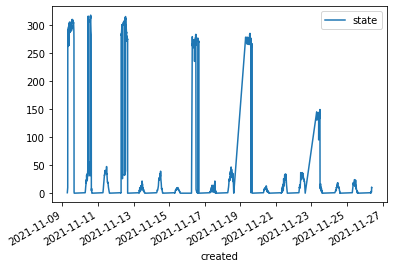

In [ ]:
df_sensor_illuminance.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

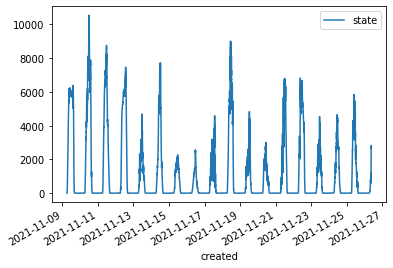

In [ ]:
df_sensor_illuminance2.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

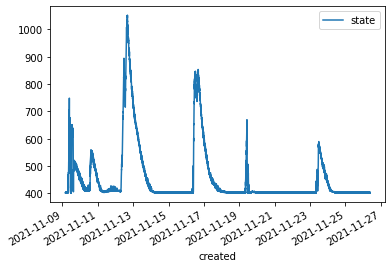

In [ ]:
df_sensor_mh_z19_co2_value.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

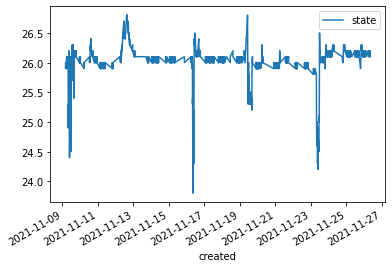

In [ ]:
df_sensor_bme280_temperature.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

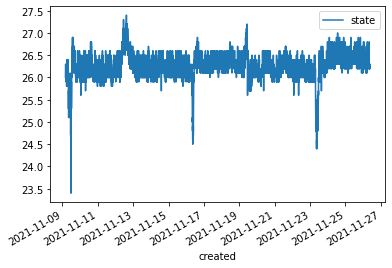

In [ ]:
df_sensor_dht22_temperature.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

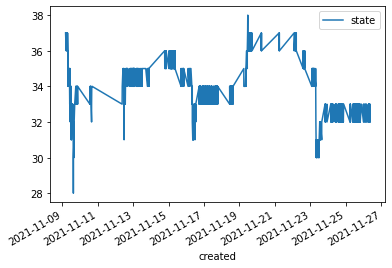

In [ ]:
df_sensor_dht22_humidity.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

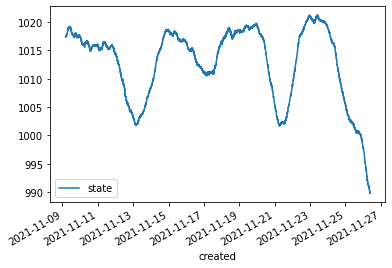

In [ ]:
df_sensor_bme280_pressure.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

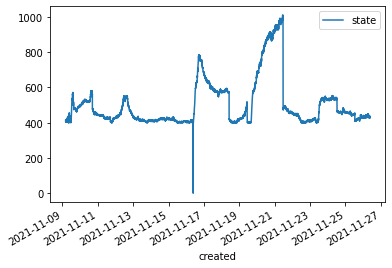

In [ ]:
df_sensor_ccs811_eco2_value.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

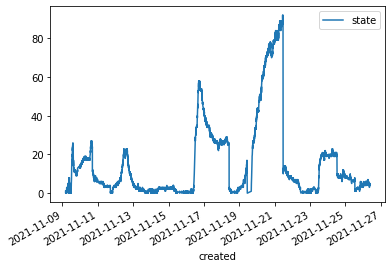

In [ ]:
df_sensor_ccs811_total_volatile_organic_compound.plot(x="created", y="state")

In [ ]:
df_sensor_ccs811_total_volatile_organic_compound[["created", "state"]]

,created,state
57,2021-11-09 04:18:48.753054,1
88,2021-11-09 04:21:48.756623,0
176,2021-11-09 04:31:48.766018,1
184,2021-11-09 04:32:48.754232,0
203,2021-11-09 04:35:48.747242,1
...,...,...
276201,2021-11-26 09:15:14.092265,4
276220,2021-11-26 09:16:14.042846,5
276230,2021-11-26 09:17:14.052541,4
276252,2021-11-26 09:18:14.058819,5


<AxesSubplot:xlabel='created'>

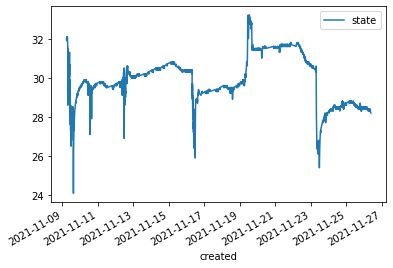

In [ ]:
df_sensor_bme280_humidity.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

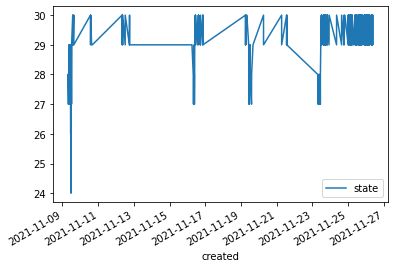

In [ ]:
df_sensor_mh_z19_temperature.plot(x="created", y="state")